# Dimer and Trimer Analysis #
This notebook goes through simulation and optimization of two simple systems, a dimer with two unique subunits,
and a fully connected trimer with unique subunits. It's purpose is to demonstrate the optimizer, confirm that the simulator
works as expected, and see if we can see any interesting kinetic effects in the simplest systems.

In summary, we do not see trapping, nor any pre equilibrium optimizability (as seen with AP2) in either the trimer or dimer.

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../")
import copy
import numpy as np

In [2]:
from steric_free_simulator import Optimizer
from steric_free_simulator import ReactionNetwork
from steric_free_simulator import EquilibriumSolver

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x10db15e48>


<h2> Load basic dimer info </h2>
Specifies reaction A + B <--> AB, with starting with 2000 copies of A and 1000 copies of B.

In [3]:
base_input = '../input_files/dimer.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()

<h2>Create an optimizer object to attempt to optimize this reaction network</h2>
Since we are running vectorized simulations here, the reaction network will be transformed into a matrix representation.

In [4]:
rn.reset()
optim = Optimizer(reaction_network=rn,
                  sim_runtime=1,
                  optim_iterations=10,
                  learning_rate=.1)
optim.rn.update_reaction_net(rn)

Using CPU


In [5]:
vec_rn = optim.optimize()

Using CPU
yield on sim iteration 0 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 3 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 4 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 5 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 6 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 7 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 8 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 9 was 84.6%
optimization complete


<h3> Plot the simulation at the first iteration (before optimization) </h3>

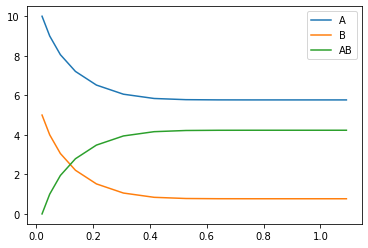

In [6]:
optim.plot_observable(iteration=0)


<h3> Plot the simulation at the last iteration (after all optimization) </h3>

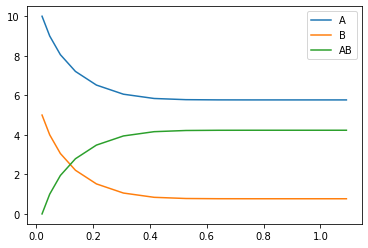

In [7]:
optim.plot_observable(iteration=-1)


<h3> Plot the yield curve over all iterations </h3>

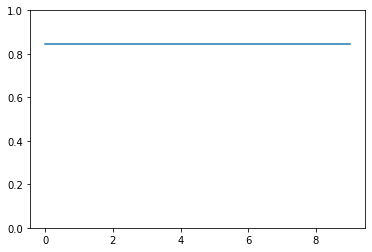

In [8]:
optim.plot_yield()

In [9]:
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve()
print(solution)
print("Equilibrium expected yield: ", solution[-1] / min(optim.rn.initial_copies[:optim.rn.num_monomers]))

Matrix([[5.767036], [0.7670359], [4.232964]])
Equilibrium expected yield:  0.846592819690704


<h3> Summary of dimer test</h3>
The dimer model, reaches the same equilbrium regardless of the parameters, and the equilibrium found with the simulator
matches the theoretical equilibrium solution. We do not observe any trapping or other interesting kinetic effects.

<h2> Load basic Trimer info </h2>
Specifies reactions

 - A + B <--> AB
 - B + C <--> BC
 - A + C <--> AC
 - AB + C <--> ABC
 - BC + A <--> ABC
 - AC + B <--> ABC

With starting copy numbers of:

 - A: 5.0 mol
 - B: 5.0 mol
 - C: 5.0 mol

In [10]:
base_input = '../input_files/trimer.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()

<h2>Create an optimizer object to attempt to optimize this reaction network</h2>

Here I set the runtime so that initially the system doesn't reach equilibrium. This allows the optimizer more flexibility
since it can try to optimize yield out of equilibrium.

In [11]:
rn.intialize_activations()
optim = Optimizer(reaction_network=rn,
                  sim_runtime=.6,
                  optim_iterations=1000,
                  learning_rate=.1)
# update rn params to match computed rate constants
optim.rn.update_reaction_net(rn)

Using CPU


In [12]:
optim.optimize()
final_rn = copy.deepcopy(rn)
optim.rn.update_reaction_net(final_rn)

Using CPU
yield on sim iteration 0 was 28.9%
current params: tensor([1.1000, 0.9000, 1.1000, 1.1000, 1.1000, 1.1000], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 29.3%
current params: tensor([1.2000, 0.9743, 1.2000, 1.2000, 1.1978, 1.1978], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 29.3%
current params: tensor([1.3000, 1.0602, 1.3000, 1.3000, 1.2920, 1.2903], dtype=torch.float64)
Using CPU
yield on sim iteration 3 was 29.3%
current params: tensor([1.3819, 1.1304, 1.4000, 1.4000, 1.3842, 1.3799], dtype=torch.float64)
Using CPU
yield on sim iteration 4 was 29.4%
current params: tensor([1.4511, 1.1898, 1.5000, 1.5000, 1.4723, 1.4646], dtype=torch.float64)
Using CPU
yield on sim iteration 5 was 29.4%
current params: tensor([1.5108, 1.2410, 1.6000, 1.6000, 1.5554, 1.5441], dtype=torch.float64)
Using CPU
yield on sim iteration 6 was 29.4%
current params: tensor([1.5629, 1.2856, 1.6873, 1.6999, 1.6327, 1.6184], dtype=torch.float64)
Using CPU
yield on sim iter

yield on sim iteration 68 was 29.5%
current params: tensor([2.0347, 1.6900, 2.4797, 2.9611, 2.8114, 3.5094], dtype=torch.float64)
Using CPU
yield on sim iteration 69 was 29.5%
current params: tensor([2.0348, 1.6901, 2.4798, 2.9614, 2.8172, 3.5308], dtype=torch.float64)
Using CPU
yield on sim iteration 70 was 29.5%
current params: tensor([2.0349, 1.6902, 2.4800, 2.9617, 2.8230, 3.5522], dtype=torch.float64)
Using CPU
yield on sim iteration 71 was 29.5%
current params: tensor([2.0350, 1.6902, 2.4802, 2.9620, 2.8288, 3.5737], dtype=torch.float64)
Using CPU
yield on sim iteration 72 was 29.5%
current params: tensor([2.0350, 1.6903, 2.4803, 2.9622, 2.8346, 3.5952], dtype=torch.float64)
Using CPU
yield on sim iteration 73 was 29.5%
current params: tensor([2.0351, 1.6903, 2.4804, 2.9624, 2.8403, 3.6168], dtype=torch.float64)
Using CPU
yield on sim iteration 74 was 29.5%
current params: tensor([2.0352, 1.6904, 2.4806, 2.9626, 2.8461, 3.6386], dtype=torch.float64)
Using CPU
yield on sim iterati

current params: tensor([2.0350, 1.6897, 2.4817, 2.9649, 3.1634, 4.9741], dtype=torch.float64)
Using CPU
yield on sim iteration 129 was 29.5%
current params: tensor([2.0350, 1.6897, 2.4817, 2.9649, 3.1695, 5.0017], dtype=torch.float64)
Using CPU
yield on sim iteration 130 was 29.5%
current params: tensor([2.0350, 1.6897, 2.4817, 2.9649, 3.1756, 5.0295], dtype=torch.float64)
Using CPU
yield on sim iteration 131 was 29.5%
current params: tensor([2.0350, 1.6896, 2.4817, 2.9649, 3.1817, 5.0571], dtype=torch.float64)
Using CPU
yield on sim iteration 132 was 29.5%
current params: tensor([2.0350, 1.6896, 2.4817, 2.9649, 3.1877, 5.0846], dtype=torch.float64)
Using CPU
yield on sim iteration 133 was 29.5%
current params: tensor([2.0349, 1.6896, 2.4817, 2.9649, 3.1937, 5.1120], dtype=torch.float64)
Using CPU
yield on sim iteration 134 was 29.5%
current params: tensor([2.0349, 1.6895, 2.4817, 2.9649, 3.1997, 5.1394], dtype=torch.float64)
Using CPU
yield on sim iteration 135 was 29.5%
current param

current params: tensor([2.0339, 1.6875, 2.4817, 2.9655, 3.5446, 6.7874], dtype=torch.float64)
Using CPU
yield on sim iteration 192 was 29.5%
current params: tensor([2.0338, 1.6875, 2.4817, 2.9655, 3.5507, 6.8173], dtype=torch.float64)
Using CPU
yield on sim iteration 193 was 29.5%
current params: tensor([2.0338, 1.6874, 2.4817, 2.9655, 3.5568, 6.8472], dtype=torch.float64)
Using CPU
yield on sim iteration 194 was 29.5%
current params: tensor([2.0338, 1.6874, 2.4817, 2.9655, 3.5629, 6.8772], dtype=torch.float64)
Using CPU
yield on sim iteration 195 was 29.5%
current params: tensor([2.0338, 1.6873, 2.4817, 2.9655, 3.5690, 6.9072], dtype=torch.float64)
Using CPU
yield on sim iteration 196 was 29.5%
current params: tensor([2.0338, 1.6873, 2.4817, 2.9655, 3.5751, 6.9374], dtype=torch.float64)
Using CPU
yield on sim iteration 197 was 29.5%
current params: tensor([2.0337, 1.6872, 2.4817, 2.9655, 3.5813, 6.9678], dtype=torch.float64)
Using CPU
yield on sim iteration 198 was 29.5%
current param

yield on sim iteration 251 was 29.5%
current params: tensor([2.0326, 1.6846, 2.4816, 2.9661, 3.9171, 8.6323], dtype=torch.float64)
Using CPU
yield on sim iteration 252 was 29.5%
current params: tensor([2.0326, 1.6845, 2.4816, 2.9661, 3.9235, 8.6640], dtype=torch.float64)
Using CPU
yield on sim iteration 253 was 29.5%
current params: tensor([2.0326, 1.6845, 2.4816, 2.9661, 3.9298, 8.6955], dtype=torch.float64)
Using CPU
yield on sim iteration 254 was 29.5%
current params: tensor([2.0325, 1.6844, 2.4816, 2.9662, 3.9361, 8.7268], dtype=torch.float64)
Using CPU
yield on sim iteration 255 was 29.5%
current params: tensor([2.0325, 1.6843, 2.4816, 2.9662, 3.9424, 8.7580], dtype=torch.float64)
Using CPU
yield on sim iteration 256 was 29.5%
current params: tensor([2.0325, 1.6843, 2.4816, 2.9662, 3.9487, 8.7892], dtype=torch.float64)
Using CPU
yield on sim iteration 257 was 29.5%
current params: tensor([2.0325, 1.6842, 2.4816, 2.9662, 3.9550, 8.8203], dtype=torch.float64)
Using CPU
yield on sim 

current params: tensor([ 2.0312,  1.6807,  2.4816,  2.9669,  4.3156, 10.5858],
       dtype=torch.float64)
Using CPU
yield on sim iteration 314 was 29.5%
current params: tensor([ 2.0312,  1.6806,  2.4816,  2.9669,  4.3222, 10.6175],
       dtype=torch.float64)
Using CPU
yield on sim iteration 315 was 29.5%
current params: tensor([ 2.0311,  1.6805,  2.4816,  2.9669,  4.3288, 10.6494],
       dtype=torch.float64)
Using CPU
yield on sim iteration 316 was 29.5%
current params: tensor([ 2.0311,  1.6805,  2.4816,  2.9669,  4.3354, 10.6813],
       dtype=torch.float64)
Using CPU
yield on sim iteration 317 was 29.5%
current params: tensor([ 2.0311,  1.6804,  2.4816,  2.9670,  4.3420, 10.7131],
       dtype=torch.float64)
Using CPU
yield on sim iteration 318 was 29.5%
current params: tensor([ 2.0311,  1.6803,  2.4815,  2.9670,  4.3486, 10.7448],
       dtype=torch.float64)
Using CPU
yield on sim iteration 319 was 29.5%
current params: tensor([ 2.0310,  1.6802,  2.4815,  2.9670,  4.3552, 10.7763

yield on sim iteration 372 was 29.5%
current params: tensor([ 2.0297,  1.6761,  2.4815,  2.9677,  4.7107, 12.4531],
       dtype=torch.float64)
Using CPU
yield on sim iteration 373 was 29.5%
current params: tensor([ 2.0297,  1.6761,  2.4815,  2.9677,  4.7175, 12.4846],
       dtype=torch.float64)
Using CPU
yield on sim iteration 374 was 29.5%
current params: tensor([ 2.0297,  1.6760,  2.4815,  2.9678,  4.7243, 12.5162],
       dtype=torch.float64)
Using CPU
yield on sim iteration 375 was 29.5%
current params: tensor([ 2.0297,  1.6759,  2.4815,  2.9678,  4.7312, 12.5478],
       dtype=torch.float64)
Using CPU
yield on sim iteration 376 was 29.5%
current params: tensor([ 2.0296,  1.6758,  2.4814,  2.9678,  4.7380, 12.5794],
       dtype=torch.float64)
Using CPU
yield on sim iteration 377 was 29.5%
current params: tensor([ 2.0296,  1.6757,  2.4814,  2.9678,  4.7449, 12.6111],
       dtype=torch.float64)
Using CPU
yield on sim iteration 378 was 29.5%
current params: tensor([ 2.0296,  1.675

yield on sim iteration 429 was 29.5%
current params: tensor([ 2.0283,  1.6710,  2.4813,  2.9686,  5.1096, 14.2560],
       dtype=torch.float64)
Using CPU
yield on sim iteration 430 was 29.5%
current params: tensor([ 2.0282,  1.6709,  2.4813,  2.9686,  5.1169, 14.2879],
       dtype=torch.float64)
Using CPU
yield on sim iteration 431 was 29.5%
current params: tensor([ 2.0282,  1.6708,  2.4813,  2.9686,  5.1241, 14.3196],
       dtype=torch.float64)
Using CPU
yield on sim iteration 432 was 29.5%
current params: tensor([ 2.0282,  1.6707,  2.4813,  2.9686,  5.1312, 14.3513],
       dtype=torch.float64)
Using CPU
yield on sim iteration 433 was 29.5%
current params: tensor([ 2.0282,  1.6706,  2.4813,  2.9687,  5.1384, 14.3829],
       dtype=torch.float64)
Using CPU
yield on sim iteration 434 was 29.5%
current params: tensor([ 2.0281,  1.6705,  2.4813,  2.9687,  5.1456, 14.4144],
       dtype=torch.float64)
Using CPU
yield on sim iteration 435 was 29.5%
current params: tensor([ 2.0281,  1.670

current params: tensor([ 2.0268,  1.6652,  2.4812,  2.9695,  5.5193, 16.0244],
       dtype=torch.float64)
Using CPU
yield on sim iteration 486 was 29.5%
current params: tensor([ 2.0267,  1.6650,  2.4812,  2.9695,  5.5268, 16.0558],
       dtype=torch.float64)
Using CPU
yield on sim iteration 487 was 29.5%
current params: tensor([ 2.0267,  1.6649,  2.4811,  2.9695,  5.5343, 16.0873],
       dtype=torch.float64)
Using CPU
yield on sim iteration 488 was 29.5%
current params: tensor([ 2.0267,  1.6648,  2.4811,  2.9696,  5.5417, 16.1188],
       dtype=torch.float64)
Using CPU
yield on sim iteration 489 was 29.5%
current params: tensor([ 2.0267,  1.6647,  2.4811,  2.9696,  5.5492, 16.1504],
       dtype=torch.float64)
Using CPU
yield on sim iteration 490 was 29.5%
current params: tensor([ 2.0266,  1.6646,  2.4811,  2.9696,  5.5567, 16.1820],
       dtype=torch.float64)
Using CPU
yield on sim iteration 491 was 29.5%
current params: tensor([ 2.0266,  1.6645,  2.4811,  2.9696,  5.5643, 16.2137

current params: tensor([ 2.0253,  1.6588,  2.4810,  2.9704,  5.9313, 17.7285],
       dtype=torch.float64)
Using CPU
yield on sim iteration 540 was 29.5%
current params: tensor([ 2.0252,  1.6587,  2.4810,  2.9705,  5.9391, 17.7601],
       dtype=torch.float64)
Using CPU
yield on sim iteration 541 was 29.5%
current params: tensor([ 2.0252,  1.6585,  2.4809,  2.9705,  5.9469, 17.7919],
       dtype=torch.float64)
Using CPU
yield on sim iteration 542 was 29.5%
current params: tensor([ 2.0252,  1.6584,  2.4809,  2.9705,  5.9548, 17.8237],
       dtype=torch.float64)
Using CPU
yield on sim iteration 543 was 29.5%
current params: tensor([ 2.0251,  1.6583,  2.4809,  2.9705,  5.9626, 17.8554],
       dtype=torch.float64)
Using CPU
yield on sim iteration 544 was 29.5%
current params: tensor([ 2.0251,  1.6582,  2.4809,  2.9705,  5.9704, 17.8870],
       dtype=torch.float64)
Using CPU
yield on sim iteration 545 was 29.5%
current params: tensor([ 2.0251,  1.6580,  2.4809,  2.9706,  5.9782, 17.9186

current params: tensor([ 2.0237,  1.6515,  2.4807,  2.9715,  6.3679, 19.4671],
       dtype=torch.float64)
Using CPU
yield on sim iteration 595 was 29.5%
current params: tensor([ 2.0236,  1.6514,  2.4807,  2.9715,  6.3760, 19.4986],
       dtype=torch.float64)
Using CPU
yield on sim iteration 596 was 29.5%
current params: tensor([ 2.0236,  1.6513,  2.4807,  2.9715,  6.3840, 19.5301],
       dtype=torch.float64)
Using CPU
yield on sim iteration 597 was 29.5%
current params: tensor([ 2.0236,  1.6511,  2.4807,  2.9715,  6.3921, 19.5617],
       dtype=torch.float64)
Using CPU
yield on sim iteration 598 was 29.5%
current params: tensor([ 2.0235,  1.6510,  2.4807,  2.9715,  6.4002, 19.5932],
       dtype=torch.float64)
Using CPU
yield on sim iteration 599 was 29.5%
current params: tensor([ 2.0235,  1.6508,  2.4807,  2.9716,  6.4083, 19.6247],
       dtype=torch.float64)
Using CPU
yield on sim iteration 600 was 29.5%
current params: tensor([ 2.0235,  1.6507,  2.4807,  2.9716,  6.4164, 19.6564

yield on sim iteration 648 was 29.5%
current params: tensor([ 2.0221,  1.6436,  2.4804,  2.9725,  6.8124, 21.1782],
       dtype=torch.float64)
Using CPU
yield on sim iteration 649 was 29.5%
current params: tensor([ 2.0220,  1.6435,  2.4804,  2.9725,  6.8208, 21.2100],
       dtype=torch.float64)
Using CPU
yield on sim iteration 650 was 29.5%
current params: tensor([ 2.0220,  1.6433,  2.4804,  2.9726,  6.8292, 21.2418],
       dtype=torch.float64)
Using CPU
yield on sim iteration 651 was 29.5%
current params: tensor([ 2.0220,  1.6432,  2.4804,  2.9726,  6.8377, 21.2737],
       dtype=torch.float64)
Using CPU
yield on sim iteration 652 was 29.5%
current params: tensor([ 2.0219,  1.6430,  2.4804,  2.9726,  6.8461, 21.3057],
       dtype=torch.float64)
Using CPU
yield on sim iteration 653 was 29.5%
current params: tensor([ 2.0219,  1.6428,  2.4804,  2.9726,  6.8545, 21.3376],
       dtype=torch.float64)
Using CPU
yield on sim iteration 654 was 29.5%
current params: tensor([ 2.0219,  1.642

current params: tensor([ 2.0203,  1.6344,  2.4801,  2.9737,  7.2989, 22.9947],
       dtype=torch.float64)
Using CPU
yield on sim iteration 706 was 29.5%
current params: tensor([ 2.0203,  1.6342,  2.4801,  2.9737,  7.3075, 23.0266],
       dtype=torch.float64)
Using CPU
yield on sim iteration 707 was 29.5%
current params: tensor([ 2.0202,  1.6340,  2.4801,  2.9737,  7.3162, 23.0585],
       dtype=torch.float64)
Using CPU
yield on sim iteration 708 was 29.5%
current params: tensor([ 2.0202,  1.6339,  2.4801,  2.9737,  7.3249, 23.0905],
       dtype=torch.float64)
Using CPU
yield on sim iteration 709 was 29.5%
current params: tensor([ 2.0202,  1.6337,  2.4801,  2.9738,  7.3336, 23.1225],
       dtype=torch.float64)
Using CPU
yield on sim iteration 710 was 29.5%
current params: tensor([ 2.0201,  1.6335,  2.4801,  2.9738,  7.3423, 23.1545],
       dtype=torch.float64)
Using CPU
yield on sim iteration 711 was 29.5%
current params: tensor([ 2.0201,  1.6334,  2.4801,  2.9738,  7.3511, 23.1867

current params: tensor([ 2.0185,  1.6243,  2.4797,  2.9749,  7.7944, 24.7966],
       dtype=torch.float64)
Using CPU
yield on sim iteration 762 was 29.5%
current params: tensor([ 2.0185,  1.6242,  2.4797,  2.9749,  7.8035, 24.8290],
       dtype=torch.float64)
Using CPU
yield on sim iteration 763 was 29.5%
current params: tensor([ 2.0184,  1.6240,  2.4797,  2.9749,  7.8125, 24.8613],
       dtype=torch.float64)
Using CPU
yield on sim iteration 764 was 29.5%
current params: tensor([ 2.0184,  1.6238,  2.4797,  2.9749,  7.8215, 24.8937],
       dtype=torch.float64)
Using CPU
yield on sim iteration 765 was 29.5%
current params: tensor([ 2.0184,  1.6236,  2.4797,  2.9750,  7.8305, 24.9260],
       dtype=torch.float64)
Using CPU
yield on sim iteration 766 was 29.5%
current params: tensor([ 2.0183,  1.6234,  2.4797,  2.9750,  7.8395, 24.9584],
       dtype=torch.float64)
Using CPU
yield on sim iteration 767 was 29.5%
current params: tensor([ 2.0183,  1.6232,  2.4797,  2.9750,  7.8486, 24.9908

yield on sim iteration 816 was 29.5%
current params: tensor([ 2.0167,  1.6135,  2.4793,  2.9761,  8.2985, 26.5878],
       dtype=torch.float64)
Using CPU
yield on sim iteration 817 was 29.5%
current params: tensor([ 2.0166,  1.6133,  2.4793,  2.9761,  8.3079, 26.6207],
       dtype=torch.float64)
Using CPU
yield on sim iteration 818 was 29.5%
current params: tensor([ 2.0166,  1.6131,  2.4793,  2.9761,  8.3173, 26.6536],
       dtype=torch.float64)
Using CPU
yield on sim iteration 819 was 29.5%
current params: tensor([ 2.0166,  1.6129,  2.4793,  2.9762,  8.3266, 26.6865],
       dtype=torch.float64)
Using CPU
yield on sim iteration 820 was 29.5%
current params: tensor([ 2.0165,  1.6127,  2.4792,  2.9762,  8.3360, 26.7194],
       dtype=torch.float64)
Using CPU
yield on sim iteration 821 was 29.5%
current params: tensor([ 2.0165,  1.6125,  2.4792,  2.9762,  8.3453, 26.7522],
       dtype=torch.float64)
Using CPU
yield on sim iteration 822 was 29.5%
current params: tensor([ 2.0165,  1.612

yield on sim iteration 873 was 29.5%
current params: tensor([ 2.0147,  1.6012,  2.4788,  2.9774,  8.8399, 28.4723],
       dtype=torch.float64)
Using CPU
yield on sim iteration 874 was 29.5%
current params: tensor([ 2.0146,  1.6009,  2.4788,  2.9774,  8.8496, 28.5058],
       dtype=torch.float64)
Using CPU
yield on sim iteration 875 was 29.5%
current params: tensor([ 2.0146,  1.6007,  2.4788,  2.9774,  8.8593, 28.5393],
       dtype=torch.float64)
Using CPU
yield on sim iteration 876 was 29.5%
current params: tensor([ 2.0146,  1.6005,  2.4788,  2.9775,  8.8690, 28.5728],
       dtype=torch.float64)
Using CPU
yield on sim iteration 877 was 29.5%
current params: tensor([ 2.0145,  1.6003,  2.4787,  2.9775,  8.8787, 28.6062],
       dtype=torch.float64)
Using CPU
yield on sim iteration 878 was 29.5%
current params: tensor([ 2.0145,  1.6000,  2.4787,  2.9775,  8.8884, 28.6395],
       dtype=torch.float64)
Using CPU
yield on sim iteration 879 was 29.5%
current params: tensor([ 2.0145,  1.599

yield on sim iteration 928 was 29.5%
current params: tensor([ 2.0127,  1.5881,  2.4782,  2.9787,  9.3816, 30.3242],
       dtype=torch.float64)
Using CPU
yield on sim iteration 929 was 29.5%
current params: tensor([ 2.0127,  1.5879,  2.4782,  2.9787,  9.3916, 30.3583],
       dtype=torch.float64)
Using CPU
yield on sim iteration 930 was 29.5%
current params: tensor([ 2.0126,  1.5876,  2.4782,  2.9787,  9.4017, 30.3924],
       dtype=torch.float64)
Using CPU
yield on sim iteration 931 was 29.5%
current params: tensor([ 2.0126,  1.5874,  2.4782,  2.9788,  9.4118, 30.4266],
       dtype=torch.float64)
Using CPU
yield on sim iteration 932 was 29.5%
current params: tensor([ 2.0125,  1.5871,  2.4782,  2.9788,  9.4219, 30.4607],
       dtype=torch.float64)
Using CPU
yield on sim iteration 933 was 29.5%
current params: tensor([ 2.0125,  1.5869,  2.4782,  2.9788,  9.4320, 30.4948],
       dtype=torch.float64)
Using CPU
yield on sim iteration 934 was 29.5%
current params: tensor([ 2.0125,  1.586

yield on sim iteration 983 was 29.5%
current params: tensor([ 2.0106,  1.5738,  2.4776,  2.9800,  9.9442, 32.2165],
       dtype=torch.float64)
Using CPU
yield on sim iteration 984 was 29.5%
current params: tensor([ 2.0106,  1.5735,  2.4776,  2.9801,  9.9546, 32.2513],
       dtype=torch.float64)
Using CPU
yield on sim iteration 985 was 29.5%
current params: tensor([ 2.0105,  1.5732,  2.4776,  2.9801,  9.9650, 32.2862],
       dtype=torch.float64)
Using CPU
yield on sim iteration 986 was 29.5%
current params: tensor([ 2.0105,  1.5730,  2.4776,  2.9801,  9.9755, 32.3211],
       dtype=torch.float64)
Using CPU
yield on sim iteration 987 was 29.5%
current params: tensor([ 2.0105,  1.5727,  2.4776,  2.9801,  9.9859, 32.3559],
       dtype=torch.float64)
Using CPU
yield on sim iteration 988 was 29.5%
current params: tensor([ 2.0104,  1.5724,  2.4776,  2.9801,  9.9964, 32.3907],
       dtype=torch.float64)
Using CPU
yield on sim iteration 989 was 29.5%
current params: tensor([ 2.0104,  1.572

<h3> Plot the simulation at the first iteration (before optimization) </h3>

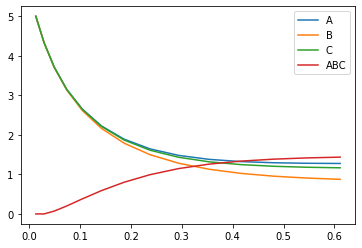

In [13]:
optim.plot_observable(iteration=0)

<h3> Plot the simulation at the last iteration (after all optimization) </h3>

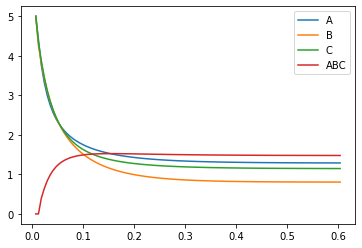

In [14]:
optim.plot_observable(iteration=-1)

<h3> Plot the yield curve over all iterations </h3>

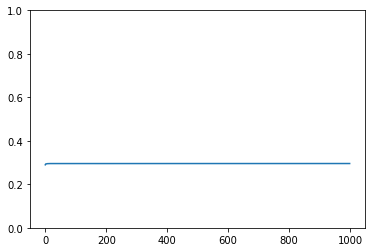

In [15]:
optim.plot_yield()

In [16]:
eq_sol = EquilibriumSolver(rn)
solution = eq_sol.solve()
print(solution)
print("Equilibrium expected yield: ", solution[-1] / min(optim.rn.initial_copies[:optim.rn.num_monomers]))

Matrix([[1.286274], [0.8042001], [1.145101], [1.289188], [0.9482870], [1.430361], [1.476251]])
Equilibrium expected yield:  0.295250207185745


In [17]:
print('Generated Equilibrium Equations')
for eqn in eq_sol.poly_system:
    print(eqn, '= 0')

Generated Equilibrium Equations
A + AB + ABC + AC - 5.0 = 0
AB + ABC + B + BC - 5.0 = 0
ABC + AC + BC + C - 5.0 = 0
-1.0*A*B + 0.802382122288501*AB = 0
-1.0*A*C + 1.5532362317432*AC = 0
-1.0*B*C + 0.643817070168198*BC = 0
-1.0*AB*C + 1.0*ABC = 0
0.516587307127124*ABC - 1.0*AC*B = 0
-1.0*A*BC + 1.2462889840415*ABC = 0


<h3> Summary of Trimer test</h3>
After 100 iteration, we indeed increase yield at .6 seconds, but we have just found the equilibrium solution, as can be
seen from the results of the equilibrium solver. The optimizer has simply increased the rate at which the full trimer is
formed so that equilibrium is released withing the desired runtime.


The trimer model reaches the same equilibrium regardless of the parameters, and the equilibrium found with the simulator
matches the theoretical equilibrium solution. We do not observe any trapping or other interesting kinetic effects.

